<a href="https://colab.research.google.com/github/Hong-Hyun-Seung/upstage-basic-deeplearning/blob/main/(4%E1%84%80%E1%85%A1%E1%86%BC)_%E1%84%92%E1%85%A1%E1%86%AB%E1%84%80%E1%85%AE%E1%86%A8%E1%84%8B%E1%85%A5_BERT_%E1%84%8B%E1%85%A5%E1%86%AB%E1%84%8B%E1%85%A5%E1%84%86%E1%85%A9%E1%84%83%E1%85%A6%E1%86%AF_%E1%84%92%E1%85%A1%E1%86%A8%E1%84%89%E1%85%B3%E1%86%B8_1_%E1%84%92%E1%85%A1%E1%86%AB%E1%84%80%E1%85%AE%E1%86%A8%E1%84%8B%E1%85%A5_BERT_pre_training_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 한국어 BERT 모델 학습

> 작성자      
```
* 김성현 (bananaband657@gmail.com)  
1기 멘토
김바다 (qkek983@gmail.com)
박상희 (parksanghee0103@gmail.com)  
이정우 (jungwoo.l2.rs@gmail.com)
2기 멘토
박상희 (parksanghee0103@gmail.com)  
이정우 (jungwoo.l2.rs@gmail.com)
이녕우 (leenw2@gmail.com)
박채훈 (qkrcogns2222@gmail.com)
```
[CC BY-NC-ND](https://creativecommons.org/licenses/by-nc-nd/2.0/kr/)

## 학습 데이터 가져오기

In [25]:
!mkdir my_data

mkdir: cannot create directory ‘my_data’: File exists
mkdir: cannot create directory ‘my_data’: File exists


실습을 위해서 아주 작은 wiki 코퍼스를 가져와보겠습니다 :-)

In [26]:
!curl -c ./cookie -s -L "https://drive.google.com/uc?export=download&id=1zib1GI8Q5wV08TgYBa2GagqNh4jyfXZz" > /dev/null
!curl -Lb ./cookie "https://drive.google.com/uc?export=download&confirm=`awk '/download/ {print $NF}' ./cookie`&id=1zib1GI8Q5wV08TgYBa2GagqNh4jyfXZz" -o my_data/wiki_20190620_small.txt

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   408    0   408    0     0   1278      0 --:--:-- --:--:-- --:--:--  1278
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:01 --:--:--     0
100 1323k  100 1323k    0     0   742k      0  0:00:01  0:00:01 --:--:--  742k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   408    0   408    0     0    973      0 --:--:-- --:--:-- --:--:--   971
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:01 --:--:--     0
100 1323k  100 1323k    0     0   685k      0  0:00:01  0:00:01 --:--:--  685k


물론 한국어 wiki 전체 코퍼스도 공유드릴게요!

In [27]:
!curl -c ./cookie -s -L "https://drive.google.com/uc?export=download&id=1_F5fziHjUM-jKr5Pwcx1we6g_J2o70kZ" > /dev/null
!curl -Lb ./cookie "https://drive.google.com/uc?export=download&confirm=`awk '/download/ {print $NF}' ./cookie`&id=1_F5fziHjUM-jKr5Pwcx1we6g_J2o70kZ" -o my_data/wiki_20190620.txt

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   408    0   408    0     0   1700      0 --:--:-- --:--:-- --:--:--  1700
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  476M    0  476M    0     0   142M      0 --:--:--  0:00:03 --:--:--  200M
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   408    0   408    0     0   1632      0 --:--:-- --:--:-- --:--:--  1632
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  476M    0  476M    0     0   136M      0 --:--:--  0:00:03 --:--:--  189M


이제 본격적으로 BERT 학습을 위한 준비를 해봅시다.

In [28]:
!pip install transformers

## Tokenizer 만들기

corpus를 이용하 wordPiece tokenizer를 만들어보겠습니다.   
이제는 익숙하시죠? :-)

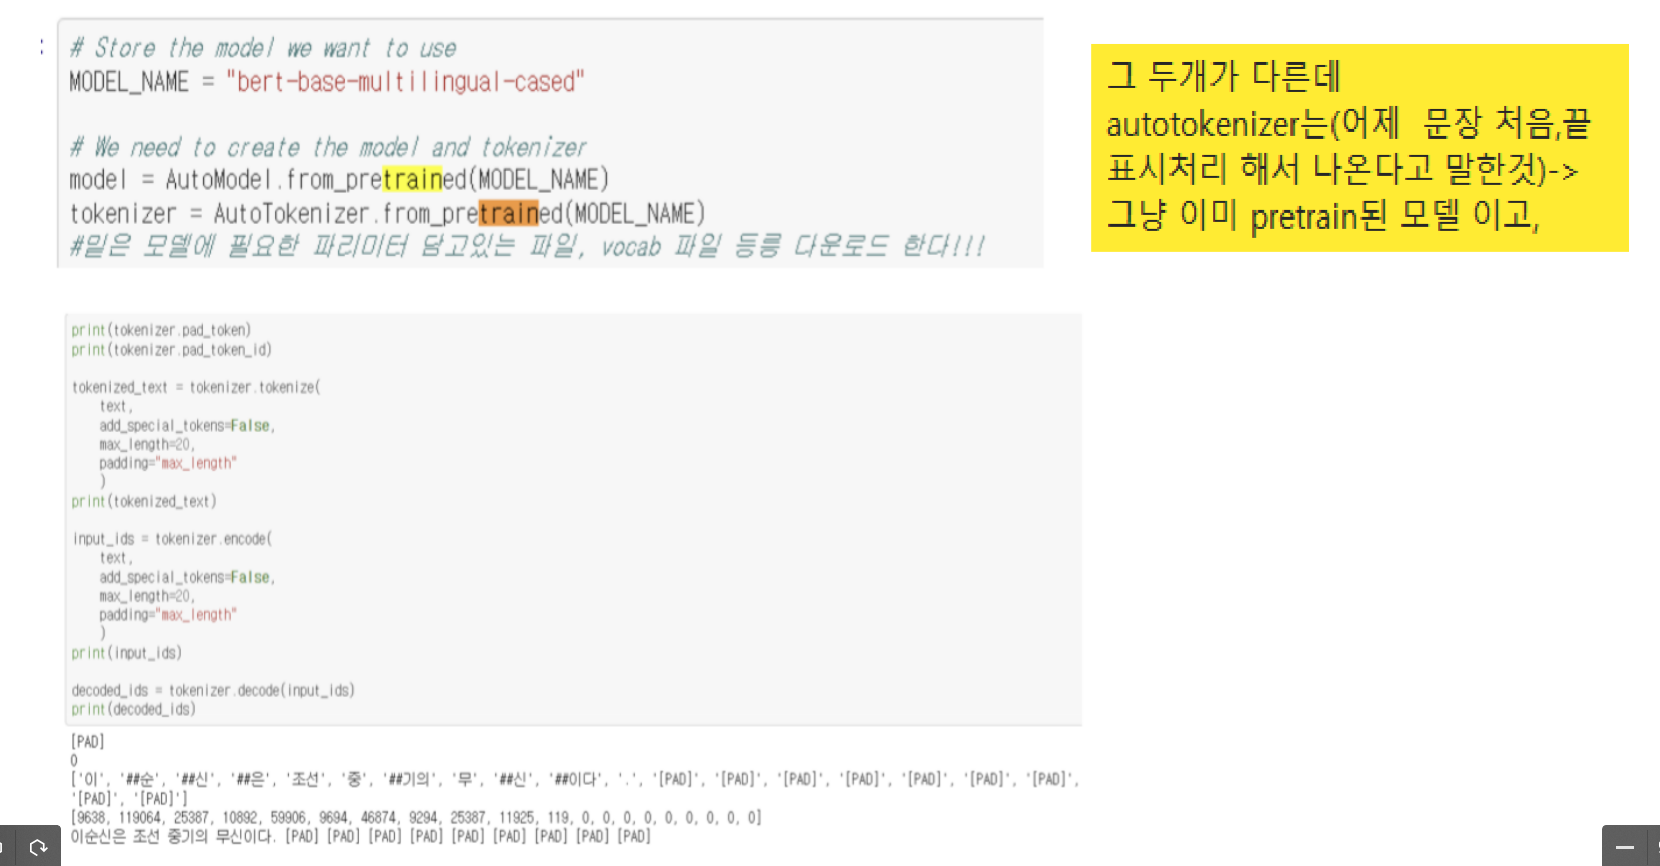

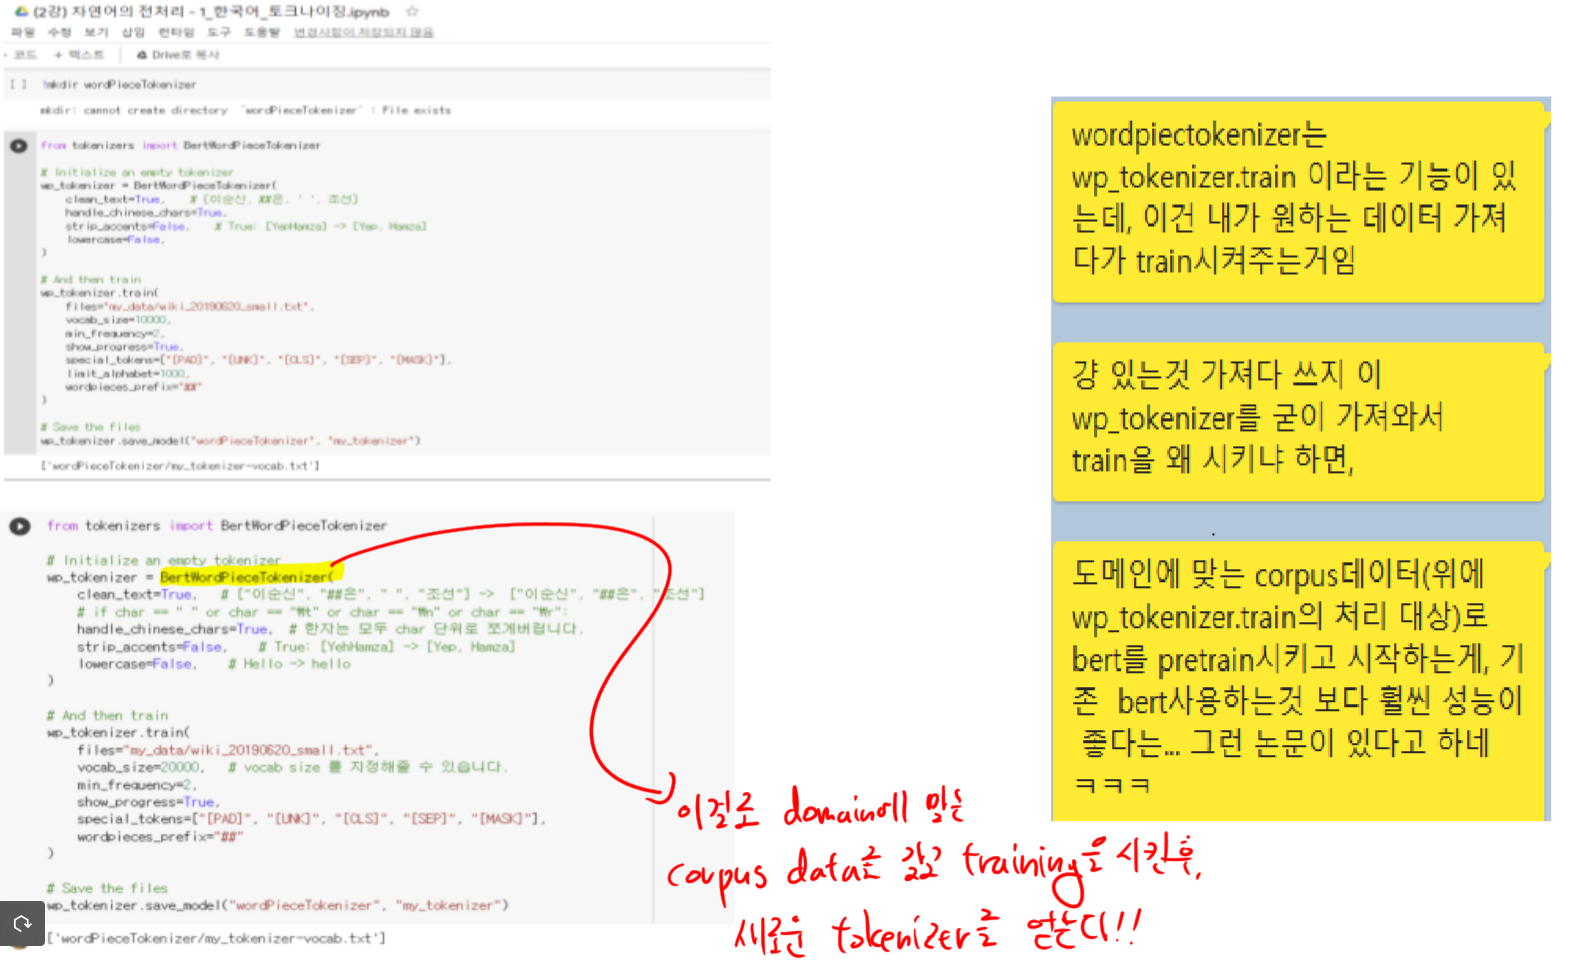

https://cryptosalamander.tistory.com/139  => 자체 데이터셋으로 BertTokenizer 학습하는 방법<br>
https://github.com/huggingface/transformers/issues/5587 => Autokenizer, Berttokenizer가 무엇인지 <br>

In [29]:
!mkdir wordPieceTokenizer

mkdir: cannot create directory ‘wordPieceTokenizer’: File exists
mkdir: cannot create directory ‘wordPieceTokenizer’: File exists


In [30]:
from tokenizers import BertWordPieceTokenizer

# Initialize an empty tokenizer
wp_tokenizer = BertWordPieceTokenizer(
    clean_text=True,   # ["이순신", "##은", " ", "조선"] ->  ["이순신", "##은", "조선"]
    # if char == " " or char == "\t" or char == "\n" or char == "\r":
    handle_chinese_chars=True,  # 한자는 모두 char 단위로 쪼게버립니다.
    strip_accents=False,    # True: [YehHamza] -> [Yep, Hamza]
    lowercase=False,    # Hello -> hello
)

# And then train
wp_tokenizer.train(
    files="my_data/wiki_20190620_small.txt",
    vocab_size=20000,   # vocab size 를 지정해줄 수 있습니다.
    min_frequency=2,
    show_progress=True,
    special_tokens=["[PAD]", "[UNK]", "[CLS]", "[SEP]", "[MASK]"],
    wordpieces_prefix="##"
)

# Save the files
wp_tokenizer.save_model("wordPieceTokenizer", "my_tokenizer")

['wordPieceTokenizer/my_tokenizer-vocab.txt']

['wordPieceTokenizer/my_tokenizer-vocab.txt']

In [31]:
print(wp_tokenizer.get_vocab_size())

20000
20000


In [32]:
text = "이순신은 조선 중기의 무신이다."
tokenized_text = wp_tokenizer.encode(text)
print(tokenized_text.tokens)
print(tokenized_text.ids)

['이', '##순', '##신은', '조선', '중', '##기의', '무신', '##이다', '.']
[706, 1511, 7615, 1999, 754, 2603, 13165, 1894, 16]
['이', '##순', '##신은', '조선', '중', '##기의', '무신', '##이다', '.']
[708, 1554, 7610, 2000, 757, 2602, 13165, 1895, 16]


## BERT 학습

In [33]:
import torch
torch.cuda.is_available()

True

True

In [34]:
from transformers import BertConfig, BertForPreTraining, BertTokenizerFast

위 과정에서 생성한 tokenizer를 불러옵니다.

In [35]:
tokenizer = BertTokenizerFast(
    vocab_file='/content/wordPieceTokenizer/my_tokenizer-vocab.txt',
    max_len=128,
    do_lower_case=False,
    )

In [36]:
print(tokenizer.tokenize("뷁은 [MASK] 조선 중기의 무신이다."))

['[UNK]', '[', 'M', '##AS', '##K', ']', '조선', '중', '##기의', '무신', '##이다', '.']
['[UNK]', '[', 'M', '##AS', '##K', ']', '조선', '중', '##기의', '무신', '##이다', '.']


In [37]:
tokenizer.add_special_tokens({'mask_token':'[MASK]'})#마스크 토큰 등록해주는 과정
print(tokenizer.tokenize("이순신은 [MASK] 중기의 무신이다."))

['이', '##순', '##신은', '[MASK]', '중', '##기의', '무신', '##이다', '.']


Assigning [MASK] to the mask_token key of the tokenizer


['이', '##순', '##신은', '[MASK]', '중', '##기의', '무신', '##이다', '.']


In [38]:
tokenizer.vocab_size

20000

20000

## BERT 껍데기를 만들어준다

In [39]:
from transformers import BertConfig, BertForPreTraining
#bert 껍데기를 만드는데 필요한 조건들이 여러개가 있음
#->이를 위해 config파일을 생성한다
config = BertConfig(    # https://huggingface.co/transformers/model_doc/bert.html#bertconfig
    vocab_size=20000,#이건 무조건 지정해줘야 한다!!!
    # hidden_size=512, #trnasformer내부에 있는 hidden 벡터 size, 빠르게 동작시키고 싶으면 이것도 줄어도 ㄱㅊ
    # num_hidden_layers=12,    # transfomrmer layer 를 몇개를 쌓을 것이냐, 빠르게 동작하고 싶으면 layer수 줄였음
    # num_attention_heads=8,    # transformer attention head number
    # intermediate_size=3072,   # transformer 내에 있는 feed-forward network의 dimension size
    # hidden_act="gelu", #activation function
    # hidden_dropout_prob=0.1,
    # attention_probs_dropout_prob=0.1,
    max_position_embeddings=128,    # embedding size 최대 몇 까지 input token으로 받겠는가 지정(나의 model이 input으로 최대 어떤 size까지 input토큰을 받겠는가)
    #본인의 task에 따라 max_position_embeddings(embedding size)를 조절하면 될것 같다(댓글이면 32, 64안에서 엔간히 처리됨)
    # type_vocab_size=2,    # token type ids의 범위 (BERT는 segmentA, segmentB로 2종류)
    # pad_token_id=0, #tokenizer에서 pad token이 어떤 id를 갖는지
    # position_embedding_type="absolute" #input토큰의 위치에 따라 절댓값으로 positional encoding을 하겠다
)

model = BertForPreTraining(config=config)#bert모델 껍데기 완성!!!
model.num_parameters()

101720098

101720098

## Bert를 pretrain시키기 위해서는, bert 껍데기를 만들어준 후, dataset(우리가 새로운 corpus로 학습한 tokenizer기반)으로 만든 data를 뿌려줘야 한다

In [40]:
from transformers import DataCollatorForLanguageModeling

In [41]:
import torch
from torch.utils.data.dataset import Dataset
from transformers.tokenization_utils import PreTrainedTokenizer
from typing import Dict, List, Optional
import os
import json
import os
import pickle
import random
import time
import warnings

from filelock import FileLock

from transformers.utils import logging

logger = logging.get_logger(__name__)


BERT의 학습에서 가장 중요한 요소 중 하나는, 다음 문장을 예측하는 것 입니다.   
아래 코드를 통해 다음 문장을 예측하기 위한 dataset을 구성합니다.   <br>
## 아래 dataset코드는 공식 bert 깃헙에서 복붙해온것 입니다!(쫄지말것)

In [42]:
class TextDatasetForNextSentencePrediction(Dataset): 
    """
    This will be superseded by a framework-agnostic approach soon.
    """

    def __init__( #여기 안은 그냥 initialize 하는것
        self,
        tokenizer: PreTrainedTokenizer,
        file_path: str,
        block_size: int,
        overwrite_cache=False,
        short_seq_probability=0.1,
        nsp_probability=0.5,
    ):
        # 여기 부분은 학습 데이터를 caching하는 부분입니다 :-) 매번 전처리를 하면 시간이 오래걸리니깐, 이를 방지
        assert os.path.isfile(file_path), f"Input file path {file_path} not found"

        self.block_size = block_size - tokenizer.num_special_tokens_to_add(pair=True)
        self.short_seq_probability = short_seq_probability
        self.nsp_probability = nsp_probability

        directory, filename = os.path.split(file_path)
        cached_features_file = os.path.join(
            directory,
            "cached_nsp_{}_{}_{}".format(
                tokenizer.__class__.__name__,
                str(block_size),
                filename,
            ),
        )

        self.tokenizer = tokenizer

        lock_path = cached_features_file + ".lock"

        # Input file format:
        # (1) One sentence per line. These should ideally be actual sentences, not
        # entire paragraphs or arbitrary spans of text. (Because we use the
        # sentence boundaries for the "next sentence prediction" task).
        # (2) Blank lines between documents. Document boundaries are needed so
        # that the "next sentence prediction" task doesn't span between documents.
        #
        # Example:
        # I am very happy.
        # Here is the second sentence.
        #
        # A new document.

        with FileLock(lock_path):
            if os.path.exists(cached_features_file) and not overwrite_cache:
                start = time.time()
                with open(cached_features_file, "rb") as handle:
                    self.examples = pickle.load(handle)
                logger.info(
                    f"Loading features from cached file {cached_features_file} [took %.3f s]", time.time() - start
                )
            else: #캐시가 존재하지 않는다 -> 본격적으로 데이터셋을 만든다
                logger.info(f"Creating features from dataset file at {directory}")
                # 여기서부터 본격적으로 dataset을 만듭니다.
                self.documents = [[]]#문서단위로 학습이 이루어지게 해야 한다
                with open(file_path, encoding="utf-8") as f:
                    while True: # 일단 문장을 읽고
                        line = f.readline()
                        if not line:
                            break
                        line = line.strip()

                        # 이중 띄어쓰기가 발견된다면, 나왔던 문장들을 모아 하나의 문서로 묶어버립니다.
                        # 즉, 문단 단위로 데이터를 저장합니다.
                        if not line and len(self.documents[-1]) != 0:
                            self.documents.append([])
                        tokens = tokenizer.tokenize(line)
                        tokens = tokenizer.convert_tokens_to_ids(tokens)
                        if tokens:
                            self.documents[-1].append(tokens)#documents의 가장 마지막에 token들을 이어붙이는것
                # 이제 코퍼스 전체를 읽고, 문서 데이터를 생성했습니다! :-)
                logger.info(f"Creating examples from {len(self.documents)} documents.")
                self.examples = []
                # 본격적으로 학습을 위한 데이터로 변형시켜볼까요?
                for doc_index, document in enumerate(self.documents):
                    self.create_examples_from_document(document, doc_index) # 함수로 가봅시다.

                start = time.time()
                with open(cached_features_file, "wb") as handle:
                    pickle.dump(self.examples, handle, protocol=pickle.HIGHEST_PROTOCOL)
                logger.info(
                    "Saving features into cached file %s [took %.3f s]", cached_features_file, time.time() - start
                )

    def create_examples_from_document(self, document: List[List[int]], doc_index: int):
        """Creates examples for a single document."""
        # 문장의 앞, 뒤에 [CLS], [SEP] token이 부착되기 때문에, 내가 지정한 size에서 2 만큼 빼줍니다.
        # 예를 들어 128 token 만큼만 학습 가능한 model을 선언했다면, 학습 데이터로부터는 최대 126 token만 가져오게 됩니다.
        max_num_tokens = self.block_size - self.tokenizer.num_special_tokens_to_add(pair=True)

        # We *usually* want to fill up the entire sequence since we are padding
        # to `block_size` anyways, so short sequences are generally wasted
        # computation. However, we *sometimes*
        # (i.e., short_seq_prob == 0.1 == 10% of the time) want to use shorter
        # sequences to minimize the mismatch between pretraining and fine-tuning.
        # The `target_seq_length` is just a rough target however, whereas
        # `block_size` is a hard limit.

        # 여기가 재밌는 부분인데요!
        # 위에서 설명했듯이, 학습 데이터는 126 token(128-2)을 채워서 만들어지는게 목적입니다.
        # 하지만 나중에 BERT를 사용할 때, 126 token 이내의 짧은 문장을 테스트하는 경우도 분명 많을 것입니다 :-)
        # 그래서 short_seq_probability 만큼의 데이터에서는 2-126 사이의 random 값으로 학습 데이터를 만들게 됩니다.
        target_seq_length = max_num_tokens
        if random.random() < self.short_seq_probability: #random.random()은 0~1사이의 값이 나온다, short_seq_probability는 현재 0.1이다
            target_seq_length = random.randint(2, max_num_tokens)
        #그니깐 위에 2줄이 뭔말이냐면, "0~1사이의 값을 random하게 발생시키는데, 0.1 미만의 값이 나오면(="대략 10번중에 한번 발생하는 경우겠지 머")
        #                               완전히 bert input 사이즈에 맞추지(126개 token 발생)말고, 그냥 2(cls, sep만 있는 상태)에서 126개 사이의 길이로 발생시켜라"
        current_chunk = []  # a buffer stored current working segments
        current_length = 0
        i = 0

        # 데이터 구축의 단위는 document 입니다
        # 이 때, 무조건 문장_1[SEP]문장_2 이렇게 만들어지는 것이 아니라,
        # 126 token을 꽉 채울 수 있게 문장_1+문장_2[SEP]문장_3+문장_4 형태로 만들어질 수 있습니다.
        while i < len(document):
            segment = document[i]
            current_chunk.append(segment)
            current_length += len(segment)
            if i == len(document) - 1 or current_length >= target_seq_length:
                if current_chunk:
                    # `a_end` is how many segments from `current_chunk` go into the `A`
                    # (first) sentence.
                    a_end = 1
                    # 여기서 문장_1+문장_2 가 이루어졌을 때, 길이를 random하게 짤라버립니다 :-)
                    if len(current_chunk) >= 2:
                        a_end = random.randint(1, len(current_chunk) - 1)
                    tokens_a = []
                    for j in range(a_end):
                        tokens_a.extend(current_chunk[j])
                    # 이제 [SEP] 뒷 부분인 segmentB를 살펴볼까요?
                    tokens_b = []
                    # 50%의 확률로 랜덤하게 다른 문장을 선택하거나, 다음 문장을 학습데이터로 만듭니다.
                    if len(current_chunk) == 1 or random.random() < self.nsp_probability:
                        is_random_next = True #이건 다음문장이 아니라, 다른 문장에서 random하게 뽑아오는 경우
                        target_b_length = target_seq_length - len(tokens_a)

                        # This should rarely go for more than one iteration for large
                        # corpora. However, just to be careful, we try to make sure that
                        # the random document is not the same as the document
                        # we're processing.
                        for _ in range(10):
                            random_document_index = random.randint(0, len(self.documents) - 1)
                            if random_document_index != doc_index:
                                break
                        # 여기서 랜덤하게 선택합니다 :-)
                        random_document = self.documents[random_document_index]
                        random_start = random.randint(0, len(random_document) - 1)
                        for j in range(random_start, len(random_document)):
                            tokens_b.extend(random_document[j])
                            if len(tokens_b) >= target_b_length:
                                break
                        # We didn't actually use these segments so we "put them back" so
                        # they don't go to waste.
                        num_unused_segments = len(current_chunk) - a_end
                        i -= num_unused_segments
                    # Actual next
                    else:
                        is_random_next = False
                        for j in range(a_end, len(current_chunk)):
                            tokens_b.extend(current_chunk[j])

                    # 이제 126 token을 넘는다면 truncation을 해야합니다.
                    # 이 때, 126 token 이내로 들어온다면 행위를 멈추고,
                    # 만약 126 token을 넘는다면, segmentA와 segmentB에서 랜덤하게 하나씩 제거합니다.
                    def truncate_seq_pair(tokens_a, tokens_b, max_num_tokens):
                        """Truncates a pair of sequences to a maximum sequence length."""
                        while True:
                            total_length = len(tokens_a) + len(tokens_b)
                            if total_length <= max_num_tokens:
                                break
                            trunc_tokens = tokens_a if len(tokens_a) > len(tokens_b) else tokens_b
                            assert len(trunc_tokens) >= 1
                            # We want to sometimes truncate from the front and sometimes from the
                            # back to add more randomness and avoid biases.
                            if random.random() < 0.5:
                                del trunc_tokens[0]
                            else:
                                trunc_tokens.pop()

                    truncate_seq_pair(tokens_a, tokens_b, max_num_tokens)

                    assert len(tokens_a) >= 1
                    assert len(tokens_b) >= 1

                    # add special tokens
                    input_ids = self.tokenizer.build_inputs_with_special_tokens(tokens_a, tokens_b)
                    # add token type ids, 0 for sentence a, 1 for sentence b
                    token_type_ids = self.tokenizer.create_token_type_ids_from_sequences(tokens_a, tokens_b)
                    
                    # 드디어 아래 항목에 대한 데이터셋이 만들어졌습니다! :-)
                    # 즉, segmentA[SEP]segmentB, [0, 0, .., 0, 1, 1, ..., 1], NSP 데이터가 만들어진 것입니다 :-)
                    # 그럼 다음은.. 이 데이터에 [MASK] 를 씌워야겠죠?
                    example = {
                        "input_ids": torch.tensor(input_ids, dtype=torch.long),
                        "token_type_ids": torch.tensor(token_type_ids, dtype=torch.long),
                        "next_sentence_label": torch.tensor(1 if is_random_next else 0, dtype=torch.long),
                    }

                    self.examples.append(example)

                current_chunk = []
                current_length = 0

            i += 1

    def __len__(self):
        return len(self.examples)

    def __getitem__(self, i):
        return self.examples[i]

In [43]:
dataset = TextDatasetForNextSentencePrediction(
    tokenizer=tokenizer,
    file_path='/content/my_data/wiki_20190620_small.txt',
    block_size=128,#모델의 embeddingsize
    overwrite_cache=False,
    short_seq_probability=0.1,
    nsp_probability=0.5,
)

data_collator = DataCollatorForLanguageModeling(    # [MASK] 를 씌우는 것은 저희가 구현하지 않아도 됩니다! :-)
    tokenizer=tokenizer, mlm=True, mlm_probability=0.15
)

이렇게 만들어진 학습 데이터를 확인해봅니다.

In [44]:
for example in dataset.examples[0:1]:
    print(example)

{'input_ids': tensor([    2,  4357,   638,     6,  5499,     6,  5506,  9442,  2492,  2431,
         2783,  1971,  5381,  3122,  1943,  2410,    17,     3,    17,  5431,
         1905,  1107,  3905,  1919,  2988, 10225,     1,  4623,  2274,  8579,
         2323, 17413,  1046, 13173,  5654,    17,  2079, 18247,  2052,  1959,
         1046,  7671, 17868, 11105,  1046,  2373,   591,  5029,  7519, 14811,
         5673,    17,  1986,  2052,  8579, 10062, 13451,  1273,  1959, 10225,
         7839,  1082,    15,  4368,  1202,  8092,  2235, 10854,  7189,  3321,
         2821, 16497,  1208, 15352,  5959,  1208, 15351,  4929,  1012,  2246,
           17,  3175,  2039,  8765, 15507, 11841,  7520,  1899,  2324,  3505,
         3158,  4025,  1951,  5435,  2324,   707, 11545,   493,  1907,  2703,
         1176,  7617,     1,  5185,   719,  1277, 13230,    17,  3905,  1029,
         5435, 13799,  5762,  4757,  1903, 13799, 19511,  1061,  6333,  1030,
         2703,  6381,  8226,  1067,     3]), 'toke

[MASK]를 부착하는 data collator의 역할은 다음과 같습니다.

In [45]:
print(data_collator(dataset.examples))

{'input_ids': tensor([[    2,  4357,   638,  ...,     4,  1067,     3],
        [    2,  5499,     4,  ...,  6173, 11281,     3],
        [    2,  6414,  1943,  ...,     4,  3665,     3],
        ...,
        [    2,  1294, 11711,  ...,  1904,    17,     3],
        [    2, 12579, 13171,  ...,  2661,    17,     3],
        [    2, 12579, 10891,  ..., 18127,  1422,     3]]), 'token_type_ids': tensor([[0, 0, 0,  ..., 1, 1, 1],
        [0, 0, 0,  ..., 1, 1, 1],
        [0, 0, 0,  ..., 1, 1, 1],
        ...,
        [0, 0, 0,  ..., 1, 1, 1],
        [0, 0, 0,  ..., 1, 1, 1],
        [0, 0, 0,  ..., 1, 1, 1]]), 'next_sentence_label': tensor([1, 0, 0,  ..., 1, 1, 1]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1]]), 'labels': tensor([[ -100,  -100,  -100,  ...,  8226,  -100,  -100],
        [ -100,  -100, 1

In [46]:
print(data_collator(dataset.examples)['input_ids'][0])

tensor([    2,  4357,   638,     6,  5499,     6,  5506,     4,  2492,  2431,
         2783,  1971,  5381,  3122,  1943,  2410,  3050,     3,    17,  5431,
         1905,  1107, 15967,  1919,  2988, 10225,     1,  4623,  2274,  8579,
         2323, 17413,  1046, 13173,  5654,    17,  2079, 18247,  2052,     4,
         1046,  7671, 17868, 11105,  1046,  2373,   591,  5029,  1598, 14811,
         5673, 10905,     4,  2052,  8579, 10062, 13451,  1273,  1959,     4,
         7839,  1082,     4,  4368,     4,  8092,  2235, 10854,  7189,  3321,
         2821, 16497,  1208, 15352,  5959,     4, 15351,  4929,  1012,  2246,
           17,  3175,  2039,  8765, 15507, 11841,  7520,  1899,  2324,  3505,
         3158,  4025,  1951,  5435,  2324,   707, 11545,   493,  1907,  2703,
         1176,  7617,     1,  5185,   719,  1277, 13230,     4,     4,  1029,
         5435, 13799,  5762,  4757,  1903, 13799, 19511,  1061,  6333,     4,
         2703,  6381,  8226,  1067,     3])
tensor([    2,  4357

collator 함수가 실행되면, 입력 문장에 [MASK] 가 부착됩니다.

In [47]:
tokenizer.decode(data_collator(dataset.examples)['input_ids'][0].tolist())

'[CLS] 강화 얻 # 창당 # 크롤 주축성이 라이음을 [MASK] 55 관계를이나도의 / [SEP] [MASK] 문서는하였다교 중반 같은 배포연구소 [UNK] 국가로 [MASK] 방정식이라고 마이 내비이 [MASK] [MASK] /자의 선봉되고 정의이 이론과 미들 제재를이 고무공장 슷주기 혁신 전자적 제목의 / 연구되고 방정식이라고 반대하는 [MASK]낱 정의연구소ical킬 - 무료디 [MASK]이지 손자 2위를 가진다 지금 확장팩인상 무리수의 [MASK]상 해결되지 [MASK]리 선택 / [MASK]6년 생성되는 전문으로 기록하였다 [MASK]하여 분류함수의장에서리히 나타 [MASK] 분류 익림과 벳 다음 아미편왔으며 [UNK] 시기에 잔써 백제 [MASK] 중반알 발명 전시의 반드시 크림하고 전시의 피선거키산맥은 아미 시작한 원내다 [SEP]'

'[CLS] 가우스 어 # 집필 # 크다 준이치로 [MASK] 결국소를기도 54 포함한 경우 [MASK] / [SEP] / [MASK]에는회 제한0년 반복 목소 [UNK] 판결을 [MASK] 집합론 [MASK]영방송인인 문단에 서버를 / 197 선정한시아 다른인 국가이다 미를 조세인으로써 슨구조 혁신 전자는 변호사 / 에너지시아 집합론관광부 신조곡 다른 엔탈피의ical정 - [MASK]환 매장 새로 송두 2개 프로그램을 재단 제조업체들은X 무리수의 1979년X 해결되지 대량창 따르 / 강력학의 최근의 평화의정부의 협력했다 마이졌고성의하므로 10 미시 마이 [MASK]질수록 벡적인 수는프재로 [UNK] 시기에 자재 버렸다 / 제한칼 미시 스테이크를 [MASK] [MASK] 대한 전시를 하트되트에서라 수는 집합과 울루 [MASK] [SEP]'

In [48]:
from transformers import Trainer, TrainingArguments

training_args = TrainingArguments(
    output_dir='model_output',
    overwrite_output_dir=True,#모델이 학습됨에 따라서 기존에 저장된 곳에 계속 OVERWRITE할것인지
    num_train_epochs=10,
    per_gpu_train_batch_size=32,
    save_steps=1000,#1000step마다 저장을 한다
    save_total_limit=2,#1000step마다 저장하면 너무 많음ㅠㅠ->마지막 2개빼고 과거를 삭제해준다
    logging_steps=100#log를 몇 step마다 나타낼거냐
)

trainer = Trainer(
    model=model,#모델을 넣고
    args=training_args,#argument를 넣고
    data_collator=data_collator,#밥을 어떻게 떠먹여 줄것이냐
    train_dataset=dataset#밥은 요거다
)

PyTorch: setting up devices
The default value for the training argument `--report_to` will change in v5 (from all installed integrations to none). In v5, you will need to use `--report_to all` to get the same behavior as now. You should start updating your code and make this info disappear :-).


In [ ]:
trainer.train() # wiki 전체 데이터로 학습 시, 1 epoch에 9시간 정도 소요됩니다!! 

Using deprecated `--per_gpu_train_batch_size` argument which will be removed in a future version. Using `--per_device_train_batch_size` is preferred.
Using deprecated `--per_gpu_train_batch_size` argument which will be removed in a future version. Using `--per_device_train_batch_size` is preferred.
***** Running training *****
  Num examples = 2517
  Num Epochs = 10
  Instantaneous batch size per device = 8
  Total train batch size (w. parallel, distributed & accumulation) = 32
  Gradient Accumulation steps = 1
  Total optimization steps = 790
Using deprecated `--per_gpu_train_batch_size` argument which will be removed in a future version. Using `--per_device_train_batch_size` is preferred.


Step,Training Loss


Step,Training Loss


In [ ]:
trainer.save_model('./model_output')

BERT 학습이 완료되었습니다! :-)   
아래 코드를 실행해서 [MASK] 테스트도 가능합니다.   

In [ ]:
from transformers import BertForMaskedLM, pipeline

In [ ]:
my_model = BertForMaskedLM.from_pretrained('model_output')

In [ ]:
tokenizer.tokenize('이순신은 [MASK] 중기의 무신이다.')

In [ ]:
nlp_fill = pipeline('fill-mask', top_k=5, model=my_model, tokenizer=tokenizer)

In [ ]:
nlp_fill('이순신은 [MASK] 중기의 무신이다.')

In [ ]:
nlp_fill('[MASK]는 조선 중기의 무신이다.')

끗!